priemro calculamos el indice de alguna de las imagenes

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

lista = [2, 4, 6, 8, 10]
media = np.mean(lista)
print("La media de la lista es:", media)


La media de la lista es: 6.0


In [3]:
bandas = ['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B09', 'B11', 'B12', 'WVP', 'AOT', 'SCL', 'sunAzimuthAngles', 'sunZenithAngles', 'viewAzimuthMean', 'viewZenithMean']
datesTrain = [["2022-02-01", "2022-02-28"],["2022-03-01", "2022-03-28"],["2022-04-01", "2022-04-28"],["2022-05-01", "2022-05-28"],["2022-06-01", "2022-06-28"],
              ["2022-07-01", "2022-07-28"],["2022-08-01", "2022-08-28"],["2022-09-01", "2022-09-28"],["2022-10-01", "2022-10-28"],["2022-11-01", "2022-11-28"],
              ["2022-12-01", "2022-12-28"],["2023-01-01", "2023-01-28"],["2023-02-01", "2023-02-28"],["2023-03-01", "2023-03-28"],["2023-04-01", "2023-04-28"],["2023-05-01", "2023-05-28"]
             ,["2023-06-01", "2023-06-28"],["2023-08-01", "2023-08-28"],["2023-09-01","2023-09-28"]];
#mes = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21];
mes = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21];
datesTest = [["2023-05-01", "2023-05-28"]];
indicesNDVI =[] 
indicesGNDVI =[] 
indicesNDMI =[] 
meanNDVI = [] #NDVI (Sentinel 2) = (B8 – B4) / (B8 + B4)
meanGNDVI = [] #GNDVI (Sentinel 2) = (B08 – B03) / (B08 + B03)
meanEVI= []#EVI (Sentinel 2) = 2.5 * (B8 – B4) / ((B8 + 6 * B4 – 7.5 * B2) + 1))
meanAVI= []#AVI (Sentinel 2) = [B8 * (1 – B4)*(B8 – B4)]1/3
meanSAVI= []#SAVI (Sentinel 2) = (B08 – B04) / (B08 + B04 + 0,428) * (1,428)
meanNDMI= []#NDMI (Sentinel 2) = (B8 – B11) / (B8 + B11)
meanMSI= []#MSI (Sentinel 2) = B11 / B08
#for banda in bandas:
for date in datesTrain:
    #print(f"DB/{date[1]}banda{bandas[3]}.TIF")
    banda4 = np.asarray(Image.open(f"DB/{date[1]}banda{bandas[3]}.TIF"))    
    banda8A = np.asarray(Image.open(f"DB/{date[1]}banda{bandas[8]}.TIF"))
    banda8 = np.asarray(Image.open(f"DB/{date[1]}banda{bandas[7]}.TIF"))
    banda3 = np.asarray(Image.open(f"DB/{date[1]}banda{bandas[2]}.TIF"))
    banda2 = np.asarray(Image.open(f"DB/{date[1]}banda{bandas[1]}.TIF"))
    banda11 = np.asarray(Image.open(f"DB/{date[1]}banda{bandas[10]}.TIF"))
    banda12 = np.asarray(Image.open(f"DB/{date[1]}banda{bandas[11]}.TIF"))
    #NORMALIZAR LA MUESTRA
    banda4_norm = banda4 / banda4.max()
    banda8A_norm = banda8A / banda8A.max()
    banda3_norm = banda3 / banda3.max()
    banda2_norm = banda2 / banda2.max()
    banda11_norm = banda11 / banda11.max()
    banda12_norm = banda12 / banda12.max()
    indicesNDVI.append((banda8A-banda4)/(banda8A+banda4))
    indicesGNDVI.append((banda8-banda3)/(banda8+banda3))
    indicesNDMI.append((banda8-banda11)/(banda8+banda11))
    meanNDVI.append(np.mean((banda8-banda4)/(banda8+banda4)))
    meanGNDVI.append(np.mean((banda8-banda3)/(banda8+banda3)))
    #meanEVI.append(np.mean(2.5*(banda8-banda4)/((banda8+6*banda4-7.5*banda2)+1)))
    #meanAVI.append(np.mean(   (banda8 * (1–banda4)*(banda8 – banda4))1/3   ))
    meanNDMI.append(np.mean((banda8-banda11)/(banda8+banda11)))
    #plt.imshow(NDVI)
    #print(f"DB/{date[1]}banda{bandas[8]}.TIF")
            
#plt.imshow(indicesNDVI[0])
meanNDVItrain = meanNDVI[:len(meanNDVI)-3]
meanNDVItest = meanNDVI[len(meanNDVI)-3:]
meanNDMItrain = meanNDMI[:len(meanNDMI)-3]
meanNDMItest = meanNDMI[len(meanNDMI)-3:]

19


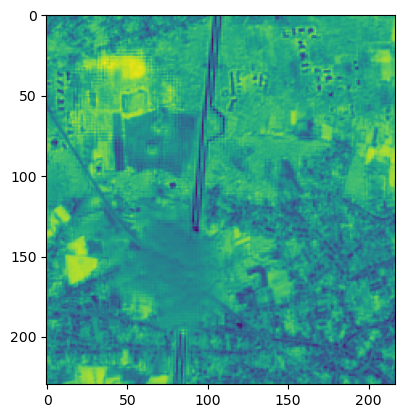

In [4]:
mediaArray = np.mean(indicesNDMI[2])
#print("La media de la lista es:", media)
#print(len(meanNDVItest))
print(len(meanNDVI))
plt.imshow(indicesNDMI[2])

En este primer ejercisio usare el ajuste polinomial para generar un polinomio que prediga el resultado del valor promedio del NDVI en este caso probare con un polinomio de grado 2


indice de vegetacion

In [5]:
mes = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17];
coef = np.polyfit(mes,meanNDVItrain,1)
predict = np.polyval(coef, 18);
predict2 = np.polyval(coef, 20);
predict3 = np.polyval(coef, 21);
print(f"el valor predicho para los meses 7 8 y 9 de 2023 es de: {[predict,predict2,predict3]} y el valor real es {meanNDVItest}")
print(f"error de: {abs(predict-meanNDVItest[1])}")
print(f"error del %: {100*abs(predict-meanNDVItest[1])/meanNDVItest[1]}")
#print(meanNDVItest[0])

el valor predicho para los meses 7 8 y 9 de 2023 es de: [0.5433401577210164, 0.5438538863485076, 0.5441107506622531] y el valor real es [0.6150009848468226, 0.6745421053765538, 0.6793636460211381]
error de: 0.1312019476555374
error del %: 19.450520080180276


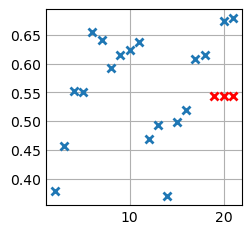

In [6]:
import matplotlib.pyplot as plt
mes = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21];
plt.style.use('_mpl-gallery')
# plot
fig, ax = plt.subplots()
ax.plot(mes, meanNDVI, 'x', markeredgewidth=2)
ax.plot([19,20,21], [predict,predict2,predict3], 'x', markeredgewidth=2, color='red')
#ax.plot(17, predict, 'x', markeredgewidth=2, color='blue')
plt.show()


Indice de humedad

In [7]:
mes = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17];
coef = np.polyfit(mes,meanNDMItrain,1)
predict = np.polyval(coef, 18);
predict2 = np.polyval(coef, 20);
predict3 = np.polyval(coef, 21);
print(f"el valor predicho para los meses 7 8 y 9 de 2023 es de: {[predict,predict2,predict3]} y el valor real es {meanNDVItest}")
print(f"error de: {abs(predict-meanNDMItest[1])}")
print(f"error del %: {100*abs(predict-meanNDMItest[1])/meanNDMItest[1]}")
#print(meanNDVItest[0])

el valor predicho para los meses 7 8 y 9 de 2023 es de: [0.1616949581314382, 0.16466203297253465, 0.16614557039308286] y el valor real es [0.6150009848468226, 0.6745421053765538, 0.6793636460211381]
error de: 0.041393433072370034
error del %: 20.381978914210748


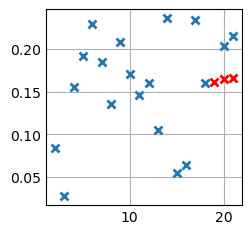

In [8]:
import matplotlib.pyplot as plt
mes = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21];
plt.style.use('_mpl-gallery')
# plot
fig, ax = plt.subplots()
ax.plot(mes, meanNDMI, 'x', markeredgewidth=2)
ax.plot([19,20,21], [predict,predict2,predict3], 'x', markeredgewidth=2, color='red')
#ax.plot(17, predict, 'x', markeredgewidth=2, color='blue')
plt.show()


regresion polinomial

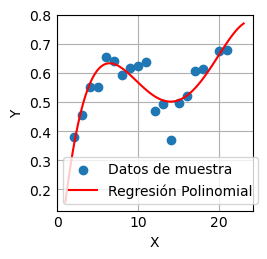

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Datos de muestra
x = np.array([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21]);#np.array([1, 2, 3, 4, 5, 6])
y = meanNDVI;#np.array([3, 6, 8, 11, 15, 18])

# Transformar los datos a un polinomio de grado 2
transformer = PolynomialFeatures(degree=4, include_bias=False)
x_poly = transformer.fit_transform(x.reshape(-1, 1))

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos transformados
model.fit(x_poly, y)

# Datos para hacer predicciones
x_new = np.array([7, 8])

# Transformar los datos a un polinomio de grado 2
x_new_poly = transformer.transform(x_new.reshape(-1, 1))

# Realizar predicciones
y_pred = model.predict(x_new_poly)

# Crear una línea para el polinomio ajustado
x_fit = np.linspace(1, 23, 100)
x_fit_poly = transformer.transform(x_fit.reshape(-1, 1))
y_fit = model.predict(x_fit_poly)

# Graficar los datos de muestra y el polinomio ajustado
plt.scatter(x, y, label='Datos de muestra')
plt.plot(x_fit, y_fit, label='Regresión Polinomial', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [89]:
from scipy.stats import shapiro
shapiro(meanNDVI)

ShapiroResult(statistic=0.9230033492245326, pvalue=0.12860934764934406)

In [91]:
# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
import statsmodels.api as sm
import pandas as pd

#mes = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17];
mes = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21];
dates = [["2022-01-01", "2022-01-28"],["2022-02-01", "2022-02-28"],["2022-03-01", "2022-03-28"],["2022-04-01", "2022-04-28"],["2022-05-01", "2022-05-28"],["2022-06-01", "2022-06-28"],
              ["2022-07-01", "2022-07-28"],["2022-08-01", "2022-08-28"],["2022-09-01", "2022-09-28"],["2022-10-01", "2022-10-28"],["2022-11-01", "2022-11-28"],
              ["2022-12-01", "2022-12-28"],["2023-01-01", "2023-01-28"],["2023-02-01", "2023-02-28"],["2023-03-01", "2023-03-28"],["2023-04-01", "2023-04-28"],["2023-05-01", "2023-05-28"]
               ,["2023-05-01", "2023-05-28"]];
meanNDVItrain.append(meanNDVItest[0])
datos = pd.DataFrame({'meses': mes, 'NDVI': meanNDVI,'NDMI': meanNDMI},)
datos.head(8)

,meses,NDVI,NDMI
0,2,0.378597,0.083968
1,3,0.456750,0.027577
2,4,0.551986,0.154799
3,5,0.550901,0.192087
4,6,0.654447,0.228995
5,7,0.641472,0.184105
6,8,0.591569,0.135801
7,9,0.615212,0.208325


NDVI coeficiente de relacion

In [52]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = datos['meses'], y =  datos['NDVI'])
print(f"Coeficiente de correlación de Pearson: {corr_test[0]}")
print(f"P-value: {corr_test[1]}")

Coeficiente de correlación de Pearson: 0.3411352958481355
P-value: 0.18023949679882764


In [53]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = datos['meses'], y =  datos['NDVI'])
print(f"Coeficiente de correlación de Pearson: {corr_test[0]}")
print(f"P-value: {corr_test[1]}")

Coeficiente de correlación de Pearson: 0.3411352958481355
P-value: 0.18023949679882764


In [54]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = datos['NDMI'], y =  datos['NDVI'])
print(f"Coeficiente de correlación de Pearson: {corr_test[0]}")
print(f"P-value: {corr_test[1]}")

Coeficiente de correlación de Pearson: 0.45282681293647375
P-value: 0.0679606770723056


In [62]:
# División de los datos en train y test
# ==============================================================================
X = datos[['meses']]
y = datos['NDVI']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = False
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train, y = y_train)

LinearRegression()

In [63]:
# Información del modelo
# ==============================================================================
print(f"Intercept: {modelo.intercept_}")
print(f"Coeficiente: {list(zip(modelo.feature_names_in_, modelo.coef_))}")
print(f"Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: 0.34974910201908416
Coeficiente: [('meses', 0.023509112399537492)]
Coeficiente de determinación R^2: -0.18450137404264688


In [69]:
# Error de test del modelo 
# ==============================================================================
predicciones = modelo.predict(X=X_test)
rmse = root_mean_squared_error(y_true=y_test, y_pred=predicciones)
print(f"Primeras cinco predicciones: {predicciones[0:5]}")
print(f"Primeras cinco reales: {y_test[0:5]}")
print(f"El error (rmse) de test es: {rmse}")
#print(X_test)

Primeras cinco predicciones: [0.67887668 0.70238579 0.7258949  0.74940401]
Primeras cinco reales: 13    0.369188
14    0.497622
15    0.520123
16    0.607601
Name: NDVI, dtype: float64
El error (rmse) de test es: 0.22376665692817668


In [28]:
# Correlación lineal entre variables numéricas
# ==============================================================================
corr_matrix = datos.corr(method='pearson')
tril = np.tril(np.ones(corr_matrix.shape)).astype(bool)
corr_matrix[tril] = np.nan
corr_matrix_tidy = corr_matrix.stack().reset_index(name='r')
corr_matrix_tidy = corr_matrix_tidy.rename(columns={'level_0': 'variable_1', 'level_1': 'variable_2'})
corr_matrix_tidy = corr_matrix_tidy.dropna()
corr_matrix_tidy['r_abs'] = corr_matrix_tidy['r'].abs()
corr_matrix_tidy = corr_matrix_tidy.sort_values('r_abs', ascending=False).reset_index(drop=True)
corr_matrix_tidy

,variable_1,variable_2,r,r_abs
0,NDVI,NDMI,0.452827,0.452827
1,meses,NDVI,0.341135,0.341135
2,meses,NDMI,0.207015,0.207015


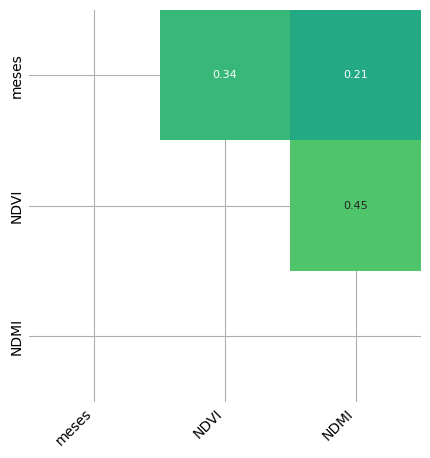

In [34]:
import seaborn as sns
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = "viridis",
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)
ax.tick_params(labelsize = 10)

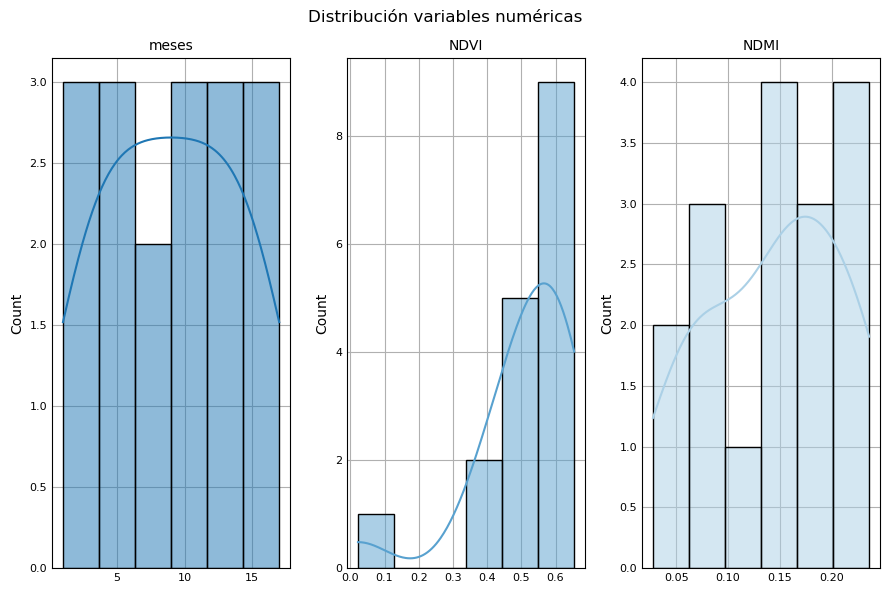

In [36]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 6))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=np.number).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10)
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
   
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 12);

Regresion lineal multiple:
primero defino la variable objetivo y las variables predictoras

In [70]:
#Seleccionar variables
x1 = "meses"
x2 = "NDMI"
y = "NDVI"

Coeficientes:  [0.00787363 0.92216536]
Intercepción:  0.30641434228442854
Ecuación del plano: y = 0.008 * meses + 0.922 * NDMI + 0.306
Coeficiente de determinación:  0.269


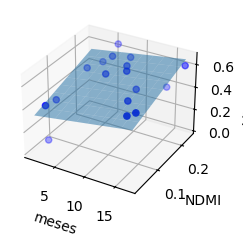

In [74]:
#Crear resultados
from sklearn.metrics import r2_score
variables_x = [x1, x2]
variable_y = y
modelo = LinearRegression()# generamos la regresión lineal
modelo.fit(datos[variables_x], datos[variable_y])# entrenamos el modelo
print ('Coeficientes: ', modelo.coef_) #obtenemos los coeficientes de las variables independientes
print ('Intercepción: ', modelo.intercept_) #obtenemos la intercepción
# Imprimir la ecuación del plano
print('Ecuación del plano: y = {} * meses + {} * NDMI + {}'.format(round(modelo.coef_[0], 3), round(modelo.coef_[1], 3), round(modelo.intercept_, 3)))
print ('Coeficiente de determinación: ', round(r2_score(datos[variable_y], modelo.predict(datos[variables_x])), 3))

# Gráfica en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(datos[x1], datos[x2], datos[y], color='blue')
# Crear un meshgrid para el plano
x = np.linspace(datos[x1].min(), datos[x1].max(), num=10)
y = np.linspace(datos[x2].min(), datos[x2].max(), num=10)
x, y = np.meshgrid(x, y)
# Calcular los valores z (Autos Producidos) del plano
z = modelo.intercept_ + modelo.coef_[0] * x + modelo.coef_[1] * y
# Graficar el plano
ax.plot_surface(x, y, z, alpha=0.5)
ax.set_xlabel(x1)
ax.set_ylabel(x2)
ax.set_zlabel("Vegetacion")
plt.show()

Ecuación de la recta: y =  0.005 x +  0.502
Coeficiente de correlación:  0.319
Coeficiente de determinación:  0.102


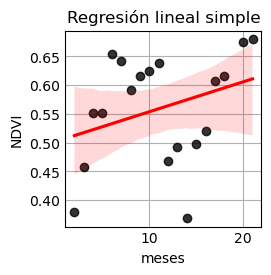

In [96]:
# Generar análisis
from sklearn.metrics import r2_score
import seaborn as sns
modelo = LinearRegression() 
variable_x = "meses"
variable_y = "NDVI"
modelo.fit(datos[[variable_x]], datos[variable_y]) 
print ('Ecuación de la recta: y = ', round(modelo.coef_[0],3),'x + ', round(modelo.intercept_,3))#obtenemos la ecuación de la recta
print ('Coeficiente de correlación: ', round(np.corrcoef(datos[variable_x], datos[variable_y])[0,1], 3))#obtenemos el coeficiente de correlación
print ('Coeficiente de determinación: ', round(r2_score(datos[variable_y], modelo.predict(datos[[variable_x]])), 3))#obtenemos el coeficiente de determinación
# Gráfica con intervalo de confianza
sns.regplot(x=datos[variable_x], y=datos[variable_y], ci=95, line_kws={"color": "red"}, scatter_kws={"color": "black"})
plt.title('Regresión lineal simple') 
plt.show()

In [ ]:
# Generar predicción 

horas_trabajadas_nuevas = 15 
horas_descanso_nuevas = 3

prediccion_nueva = pd.DataFrame({x1: [horas_trabajadas_nuevas], x2: [horas_descanso_nuevas]})
autos_producidos_prediccion = modelo.predict(prediccion_nueva)
print('La predicción de productos producidos para', horas_trabajadas_nuevas, 'horas trabajadas y', horas_descanso_nuevas, 'horas de descanso es', round(autos_producidos_prediccion[0], 3))